In [1]:

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import utils.analyze_load_utils
import utils.analyze_utils
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [20, 15]

import importlib

# EXPERIMENT CONFIGURATION

In [2]:
RESULTS_PATH = 'RESULTS'
BASE = 'MAZE'
ENVS = ["4", "5", "7", "F1", "F2", "F3", "T2", "T3"]
VARIANTS = ['-1', '3-ER', '3-EER']
METRICS = ['knowledge95', 'steps', 'steps_exploit']

NAMES = {
  METRICS[0]: 'Knowledge 95%',
  METRICS[1]: 'Explore Steps',
  METRICS[2]: 'Exploit Steps'
}

In [3]:
def _get_env_full_name(env: str):
    return f'Maze{env}-v0'

def _get_experiment_name(env: str):
    return f'MAZE_{env}_EXP_1'

def _get_metric_path(env: str, metric: str):
    return os.path.join(RESULTS_PATH, BASE, _get_env_full_name(env), _get_experiment_name(env), 'bayes_data', metric)

def _get_file_path(env: str, metric: str, variant: str):
    return os.path.join(_get_metric_path(env, metric), f'{variant}.npy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


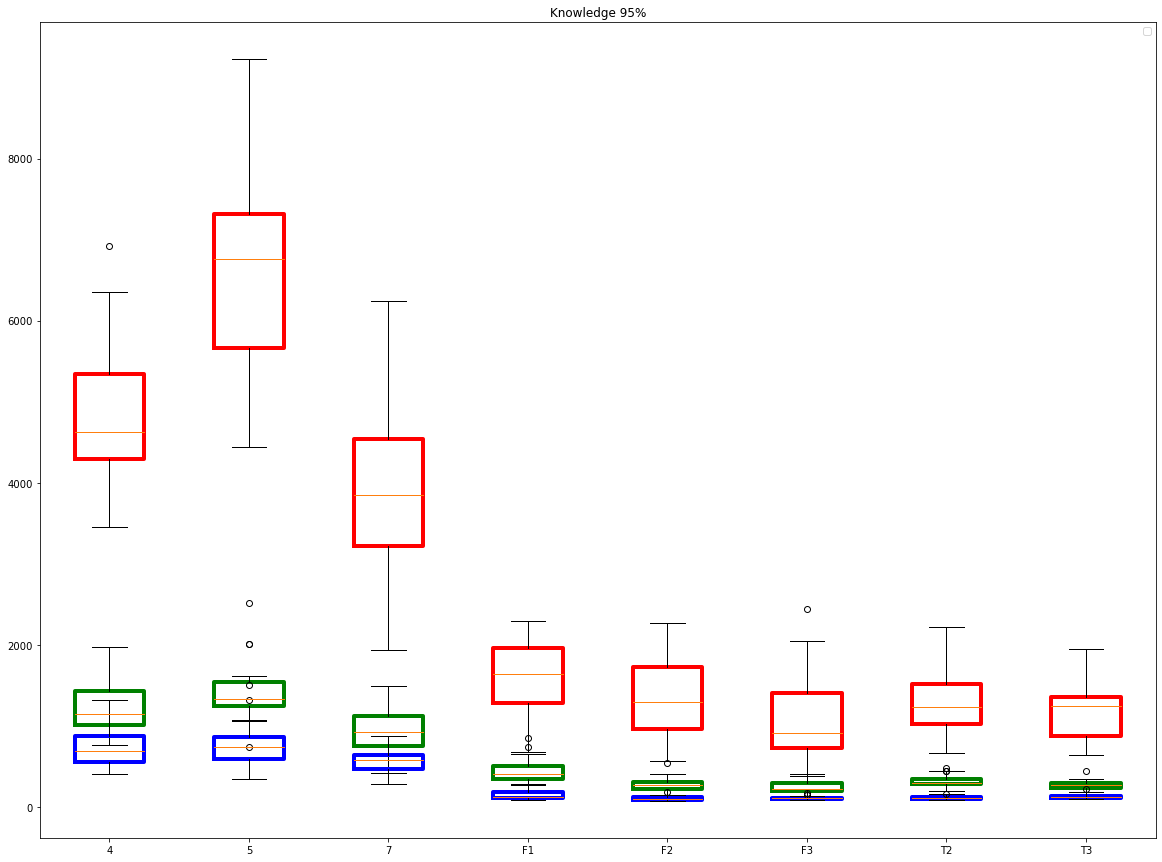

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


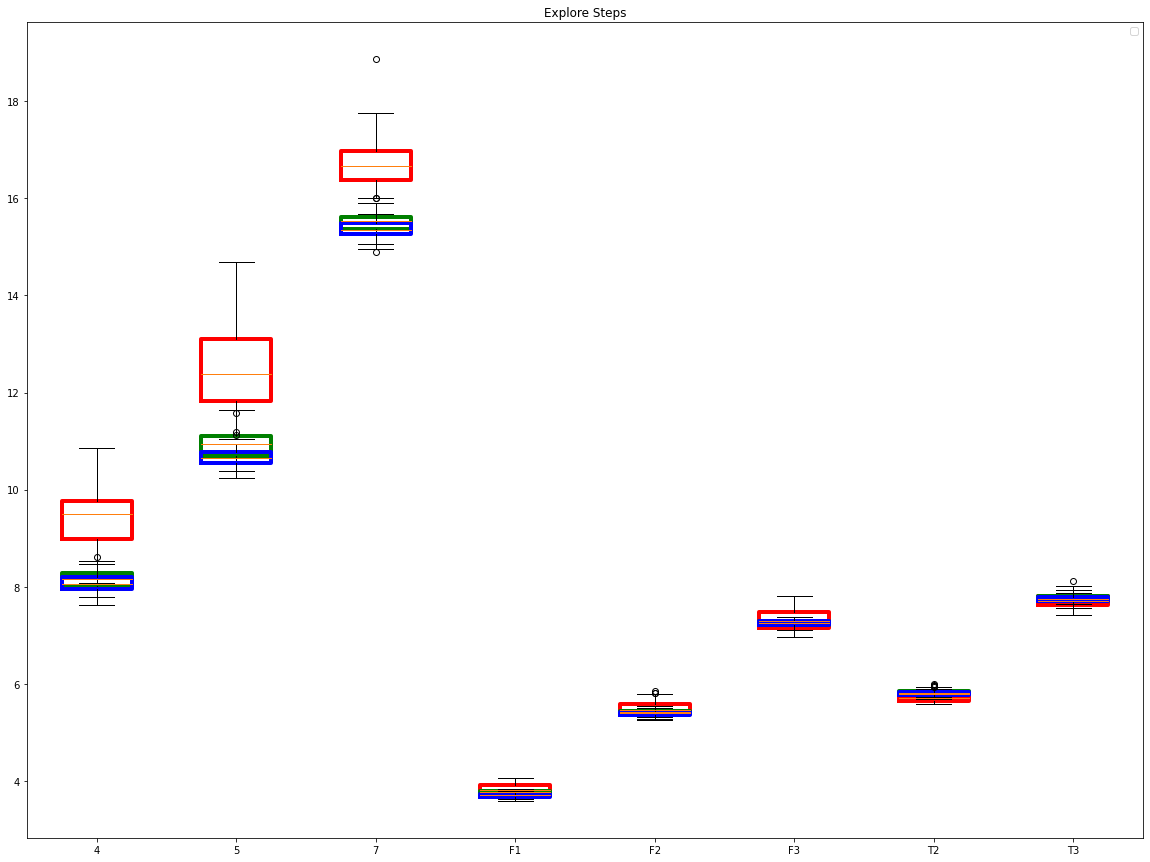

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


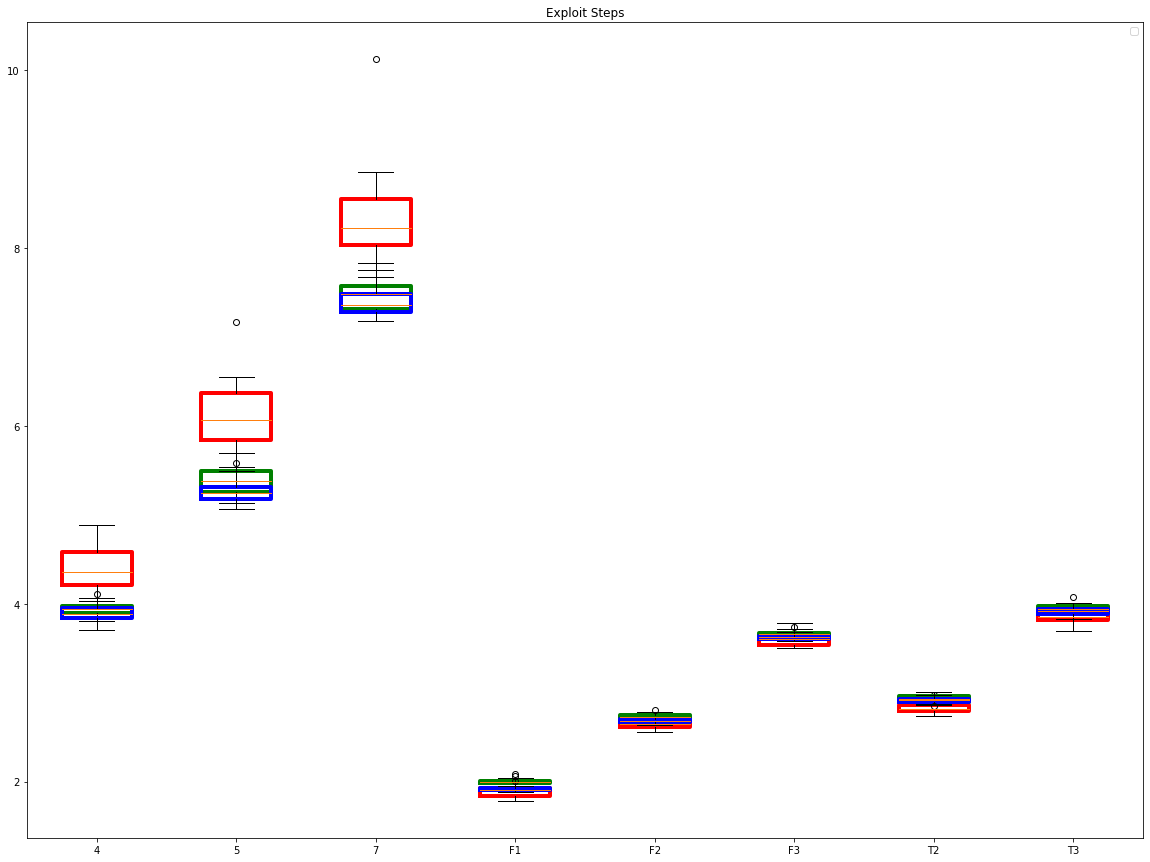

In [4]:
COLORS = ['r', 'g', 'b']
for metric in METRICS:
    # print(metric)

    metric_data = []

    for env in ENVS:
        # print(env)

        env_data = []
        metric_data.append(env_data)

        for variant in VARIANTS:
            # print(variant)


            data_path = _get_file_path(env, metric, variant)

            data = np.load(data_path)

            env_data.append(data)

            # print(data)

        # plt.boxplot(env_data)
        # plt.show()
    # sns.boxplot(data=metric_data)

    to_plot_data = np.array(metric_data)
    to_plot_data = np.moveaxis(to_plot_data, [0], [1])
    fig, ax = plt.subplots()
    for index, d in enumerate(to_plot_data):
        d = np.moveaxis(d, [0], [1])
        ax.boxplot(d, boxprops=dict(color=COLORS[index], linewidth=4))
    # plt.boxplot(metric_data)
    plt.title(NAMES[metric])
    plt.xticks(range(1, len(ENVS) + 1), ENVS)
    plt.legend()
    plt.show()